# Predict Heart Failure

## Step1: Importing Modules

In [2]:
#modules for manipulation of data
import numpy as np
import pandas as pd

#modules for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

## Step2: Importing Data

In [3]:
#the data is available as a csv file
train = pd.read_csv("heart_failure_clinical_records_dataset.csv")

<b>Description of data</b> <br>
Sex - Gender of patient Male = 1, Female =0 <br>
Age - Age of patient <br>
Diabetes - 0 = No, 1 = Yes <br>
Anaemia - 0 = No, 1 = Yes <br>
High_blood_pressure - 0 = No, 1 = Yes <br>
Smoking - 0 = No, 1 = Yes <br>
DEATH_EVENT - 0 = No, 1 = Yes <br>

## Step3:  EDA (Exploratory Data Analysis)

### Summary Statistics

#### Rows and Columns

In [4]:
#shape of the data
rows = train.shape[0]
columns = train.shape[1]

#printing the values
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 299
Number of columns: 13


#### Head

In [5]:
#viewing the initial five rows
print(train.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

#### Description

In [6]:
#describing the data
print(train.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

#### Info

In [7]:
#further information about the data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


### Missing Values
It can be observed from the values below that there are no missing values.

In [8]:
#checking for missing values
print(train.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## Step4: Feature Analysis

In [9]:
#Setting the variable for death_event
DEATH_EVENT = train["DEATH_EVENT"]

### Feature1: age
Considering 'age' is a continuosly varying data type, we will plot a scatter plot to see it's variation with the DEATH_EVENT. <br>
We will divide the age in 4 groups: <br>
group1_age =  <20 <br>
group2_age =  <= 20 age < 40 <br>
group3_age =  <= 40 age < 60 <br>
group4_age =  age >= 60


In [10]:
#setting the variable
age = train["age"]

#dividing the feature in 4 categories
group1_age = age < 20
group2_age = (age >= 20) & (age < 40)
group3_age = (age >= 40) & (age < 60)
group4_age = (age >= 60)

In [11]:
#assessing how many people died of heart failure in each category
print("Group1:", group1_age.sum())
print("Group2:", group2_age.sum())
print("Group3:", group3_age.sum())
print("Group4:", group4_age.sum())

Group1: 0
Group2: 0
Group3: 129
Group4: 170


It can be observed that not one person died in the group1 (<20) and group2 (<=20 age <40) in the provided dataset. To further filter the maximum occurence of death due to heart failure we will sub-divide groups 3 and 4. <br>
Also, we will further make group5 for : age >= 80

In [12]:
#sub-dividing group3 and group4
group3_1_age = (age >= 40) & (age < 45)
group3_2_age = (age >= 45) & (age < 50)
group3_3_age = (age >= 50) & (age < 55)
group3_4_age = (age >= 55) & (age < 60)

group4_1_age = (age >= 60) & (age < 65)
group4_2_age = (age >= 65) & (age < 70)
group4_3_age = (age >= 70) & (age < 75)
group4_4_age = (age >= 75) & (age < 80)

group5_age = (age >= 80)

In [13]:
#assessing how many people died of heart failure in each category
print("Group3_1:", group3_1_age.sum())
print("Group3_2:", group3_2_age.sum())
print("Group3_3:", group3_3_age.sum())
print("Group3_4:", group3_4_age.sum())

print("Group4_1:", group4_1_age.sum())
print("Group4_2:", group4_2_age.sum())
print("Group4_3:", group4_3_age.sum())
print("Group4_4:", group4_4_age.sum())

print("Group5  :", group5_age.sum())

Group3_1: 18
Group3_2: 29
Group3_3: 48
Group3_4: 34
Group4_1: 55
Group4_2: 38
Group4_3: 36
Group4_4: 16
Group5  : 25


It can be observed that maximum heart feailure lead death occurs in group4_1, i.e <=60 age <65, followed by group3_3 i.e, 50 <= age 55.
This observation is easier to interpret in visual form.

In [14]:
#x_axis labels
x_axis = ["group3_1_age (40-45)", "group3_2_age (45-50)", "group3_3_age (50-55)", "group3_4_age (55-60)", 
          "group4_1_age (60-65)", "group4_2_age (65-70)", "group4_3_age (70-75)", "group4_4_age (75-80)",
          "group5_age (>80)"]

#corresponding y_axis values
y_axis = [group3_1_age.sum(), group3_2_age.sum(), group3_3_age.sum(), group3_4_age.sum(), group4_1_age.sum(), 
          group4_2_age.sum(), group4_3_age.sum(), group4_4_age.sum(), group5_age.sum()]

#making a dataframe
df_age = pd.DataFrame({"x_axis": x_axis, "y_axis": y_axis})

#sorting the deaths ascending order
df_age.sort_values("y_axis")

,x_axis,y_axis
7,group4_4_age (75-80),16
0,group3_1_age (40-45),18
8,group5_age (>80),25
1,group3_2_age (45-50),29
3,group3_4_age (55-60),34
6,group4_3_age (70-75),36
5,group4_2_age (65-70),38
2,group3_3_age (50-55),48
4,group4_1_age (60-65),55


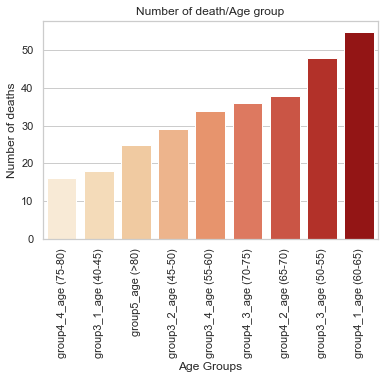

In [15]:
#plotting the bar-graph
sns.set_theme(style="whitegrid")
sns.barplot(x="x_axis", y="y_axis", data=df_age, order=df_age.sort_values('y_axis').x_axis, palette="OrRd")
plt.xlabel("Age Groups")
plt.ylabel("Number of deaths")
plt.title("Number of death/Age group")
plt.xticks(rotation=90)
plt.show()

<b>Conclusion</b>: An individual is more likely to suffer death from heart failure is he/she is in the age group 60-65 (60 inclusive).

### Feature2: anaemia

In [16]:
#checking the data-point
print(train["anaemia"])

0      0
1      0
2      0
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: anaemia, Length: 299, dtype: int64


Anaemia is a boolean data type. <br>
1 -> The person is anemic <br>
0 -> The person is not anemic <br>



We will divide the anaemia parameter into two categories. Anaemic and Non-anaemic. Then we will analyse, what proportion of anaemic people die of heart failure and similar stratergy is drawn up for non-anaemic individuals.

In [17]:
#anaemic individuals
anaemic = train["anaemia"] == 1

#non-anaemic individuals
non_anaemic = train["anaemia"] == 0

#printing the two Series
print(anaemic)
print(non_anaemic)

0      False
1      False
2      False
3       True
4       True
       ...  
294    False
295    False
296    False
297    False
298    False
Name: anaemia, Length: 299, dtype: bool
0       True
1       True
2       True
3      False
4      False
       ...  
294     True
295     True
296     True
297     True
298     True
Name: anaemia, Length: 299, dtype: bool


Calculating the proportion of people who are anaemic and non-anaemic in the given dataset.

In [18]:
#anaemic
print("Percentage of anaemic individuals:",(anaemic.sum()/rows)*100)

#non-anaemic
print("Percentage of non-anemic individuals:",(non_anaemic.sum()/rows)*100)

Percentage of anaemic individuals: 43.1438127090301
Percentage of non-anemic individuals: 56.85618729096989


Analysing proportion of anaemic individuals who die of heart failure. <br>
First Calculating the numerical statistics

In [19]:
#anaemic individuals who die of heart failure
anaemic_not_survive = train[train["anaemia"]==1]["DEATH_EVENT"]

In [20]:
#percentage of anaemic people who die
print("Percentage of anaemic people who die:" ,(anaemic_not_survive.sum()/anaemic.sum())*100)

Percentage of anaemic people who die: 35.65891472868217


In [21]:
#non_anaemic individuals who die of heart failure
non_anaemic_not_survive = train[train["anaemia"]==0]["DEATH_EVENT"]

In [22]:
#percentage of non_anaemic people who die
print("Percentage of non_anaemic who die:", (non_anaemic_not_survive.sum()/non_anaemic.sum())*100)

Percentage of non_anaemic who die: 29.411764705882355


Visualising data

In [23]:
#column for anaemia 
x_axis_anaemia = ["anaemic", "non_anaemic"]

#column for whether the person is anaemic or not
anaemia_column = [(anaemic.sum()/rows)*100, (non_anaemic.sum()/rows)*100]

#column for whether individual will die or not
x_axis_die = ["anaemic_die", "non_anaemic_die"]

#column for whether the person will die or not
die_column = [(anaemic_not_survive.sum()/anaemic.sum())*100, (non_anaemic_not_survive.sum()/non_anaemic.sum())*100]

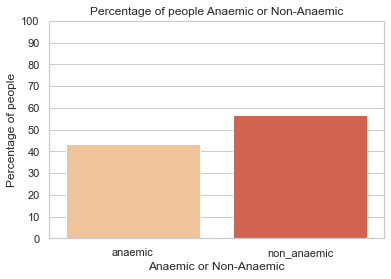

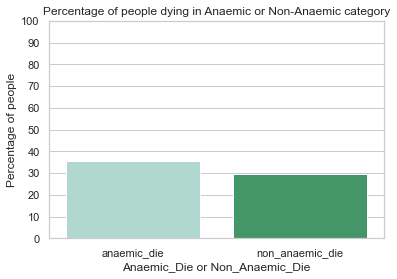

In [24]:
#plotting the 1st bar-graph which shows the percentage of anaemic and non-anaemic people
sns.barplot(x=x_axis_anaemia, y=anaemia_column, palette="OrRd")
plt.xlabel("Anaemic or Non-Anaemic")
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("Percentage of people")
plt.title("Percentage of people Anaemic or Non-Anaemic")
plt.show()

#plotting the 2nd bar-graph which shows the percentage of people individuals who die in each category
sns.barplot(x=x_axis_die, y=die_column, palette="BuGn")
plt.xlabel("Anaemic_Die or Non_Anaemic_Die")
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("Percentage of people")
plt.title("Percentage of people dying in Anaemic or Non-Anaemic category")
plt.show()

In [25]:
#column for anaemia 
x_axis_anaemia_new = ["anaemic", "non_anaemic"]

#column for whether the person is anaemic or not
anaemia_column_new = [(anaemic.sum()), (non_anaemic.sum())]

#column for whether individual will die or not
x_axis_die_new = ["anaemic_die", "non_anaemic_die"]

#column for whether the person will die or not
die_column_new = [(anaemic_not_survive.sum()), (non_anaemic_not_survive.sum())]

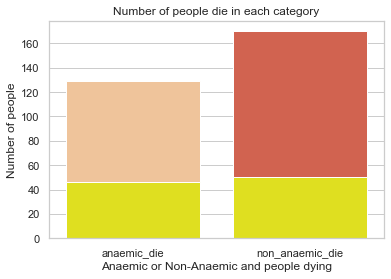

In [26]:
#plotting the 1st bar-graph which shows the percentage of anaemic and non-anaemic people
sns.barplot(x=x_axis_anaemia_new, y=anaemia_column_new, palette="OrRd")
plt.xlabel("Anaemic or Non-Anaemic and people dying")
plt.ylabel("Number of people")
plt.title("Number of people die in each category")

#plotting the 2nd bar-graph which shows the percentage of people individuals who die in each category
sns.barplot(x=x_axis_die_new, y=die_column_new, color="yellow")
plt.show()

<b>Conclusion:</b> People having anaemia have a greater chance of dying of heart failure than non-anaemic people. But 
difference is not much prevalent.

### Feature3: creatinine_phosphokinase

In [27]:
#checking the column
print(train["creatinine_phosphokinase"])

0       582
1      7861
2       146
3       111
4       160
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 299, dtype: int64


#### About creatinine_phosphokinase 
<b>Definition:</b>Creatine phosphokinase (CPK) is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. <br>
<b>Effects:</b>When the total CPK level is very high, it most often means there has been injury or stress to muscle tissue, the heart, or the brain. <br>
Muscle tissue injury is most likely. When a muscle is damaged, CPK leaks into the bloodstream. Finding which specific form of CPK is high helps determine which tissue has been damaged.<br>
<b>The pattern and timing of a rise or fall in CPK levels can be significant in making a diagnosis. This is particularly true if a heart attack is suspected.</b>
<b>Normal Levels:</b> <br>
Male: 39 – 308 U/L <br> 
Females: 26 – 192 U/L.
    
It can be concluded from the above description that higher levels of creatinine phosphokinase results in greater chances of heart attack.

Numerical Statistics

In [28]:
#creating a variable
creatinine_phosphokinase = train["creatinine_phosphokinase"]

In [29]:
#information about the column
print(creatinine_phosphokinase.describe())

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64


Considering the information provided in the description of the feature, we will categorise the data as follows: <br>
female -> level < normal -> DEATH_EVENT <br>
female -> level = normal -> DEATH_EVENT <br>
female -> level > normal -> DEATH_EVENT <br>

male -> level < normal -> DEATH_EVENT <br>
male -> level == normal -> DEATH_EVENT <br>
male -> level > normal -> DEATH_EVENT <br>

In [30]:
#categorising female
female_lvl_less = ((train["creatinine_phosphokinase"] < 25) & (train["sex"] == 0))
female_lvl_equal = ((train["creatinine_phosphokinase"] >= 25) & (train["creatinine_phosphokinase"] < 200) & (train["sex"] == 0))
female_lvl_more = ((train["creatinine_phosphokinase"] >= 200) & (train["sex"] == 0))

#categorising male
male_lvl_less = ((train["creatinine_phosphokinase"] < 40) & (train["sex"] == 1))
male_lvl_equal = ((train["creatinine_phosphokinase"] >= 40) & (train["creatinine_phosphokinase"] < 300) & (train["sex"] == 1))
male_lvl_more = ((train["creatinine_phosphokinase"] >= 300) & (train["sex"] == 1))

Number of males and females.

In [31]:
#females
females = (train["sex"]==0).sum()

#males
males = (train["sex"]==1).sum()

#printing the output
print("Percentage of female:", females/rows*100)
print("Percentage of male:", males/rows*100)

Percentage of female: 35.11705685618729
Percentage of male: 64.88294314381271


Percentage of individuals in each category

In [32]:
print("Females with < normal:", female_lvl_less.sum())
print("Females with == normal:", female_lvl_equal.sum())
print("Females with > normal:", female_lvl_more.sum())

print("Males with < normal:", male_lvl_less.sum())
print("Males with == normal:", male_lvl_equal.sum())
print("Males with > normal:", male_lvl_more.sum())

Females with < normal: 0
Females with == normal: 44
Females with > normal: 61
Males with < normal: 2
Males with == normal: 102
Males with > normal: 90


It can be observed that more individuals (male as well as female) have greater than normal levels. <br>
Now we will see proportion of people who die in each category.

Studying the female categories 

In [33]:
#female -> level < normal
#value == 0
#die
female_lvl_less_survive = (female_lvl_less & (train["DEATH_EVENT"] == 0))
#do not die
female_lvl_less_not_survive = (female_lvl_less & (train["DEATH_EVENT"] == 1))

#female -> level == normal
#die
female_lvl_equal_survive = (female_lvl_equal & (train["DEATH_EVENT"] == 0))
#do not die
female_lvl_equal_not_survive = (female_lvl_equal & (train["DEATH_EVENT"] == 1))

#female -> level > normal
#die
female_lvl_more_survive = (female_lvl_more & (train["DEATH_EVENT"] == 0))
#do not die
female_lvl_more_not_survive = (female_lvl_more & (train["DEATH_EVENT"] == 1))

In [34]:
#printing
print("Percentage of female -> == normal & survived:", female_lvl_equal_survive.sum()/female_lvl_equal.sum()*100)
print("Percentage of female -> == normal & not_survived:", female_lvl_equal_not_survive.sum()/female_lvl_equal.sum()*100)

print("Percentage of female -> > normal & survived:", female_lvl_more_survive.sum()/female_lvl_more.sum()*100)
print("Percentage of female -> > normal & not_survived:", female_lvl_more_not_survive.sum()/female_lvl_more.sum()*100)

Percentage of female -> == normal & survived: 65.9090909090909
Percentage of female -> == normal & not_survived: 34.090909090909086
Percentage of female -> > normal & survived: 68.85245901639344
Percentage of female -> > normal & not_survived: 31.147540983606557


It can be observed that females are more likely to survive in each category.

Studying the male categories

In [35]:
#male -> level < normal
male_lvl_less_survive = (male_lvl_less & (train["DEATH_EVENT"] == 0))
#do not die
male_lvl_less_not_survive = (male_lvl_less & (train["DEATH_EVENT"] == 1))

#male -> level == normal
#die
male_lvl_equal_survive = (male_lvl_equal & (train["DEATH_EVENT"] == 0))
#do not die
male_lvl_equal_not_survive = (male_lvl_equal & (train["DEATH_EVENT"] == 1))

#male -> level > normal
#die
male_lvl_more_survive = (male_lvl_more & (train["DEATH_EVENT"] == 0))
#do not die
male_lvl_more_not_survive = (male_lvl_more & (train["DEATH_EVENT"] == 1))

In [36]:
#printing
print("Percentage of male -> < normal & survived:", male_lvl_less_survive.sum()/male_lvl_less.sum()*100)
print("Percentage of male -> < normal & not_survived:", male_lvl_less_not_survive.sum()/male_lvl_less.sum()*100)

print("Percentage of male -> == normal & survived:", male_lvl_equal_survive.sum()/male_lvl_equal.sum()*100)
print("Percentage of male -> == normal & not_survived:", male_lvl_equal_not_survive.sum()/male_lvl_equal.sum()*100)

print("Percentage of male -> > normal & survived:", male_lvl_more_survive.sum()/male_lvl_more.sum()*100)
print("Percentage of male -> > normal & not_survived:", male_lvl_more_not_survive.sum()/male_lvl_more.sum()*100)

Percentage of male -> < normal & survived: 50.0
Percentage of male -> < normal & not_survived: 50.0
Percentage of male -> == normal & survived: 72.54901960784314
Percentage of male -> == normal & not_survived: 27.450980392156865
Percentage of male -> > normal & survived: 63.33333333333333
Percentage of male -> > normal & not_survived: 36.666666666666664


It can be observed that males are more likely to survive in each category.

Visualising the data

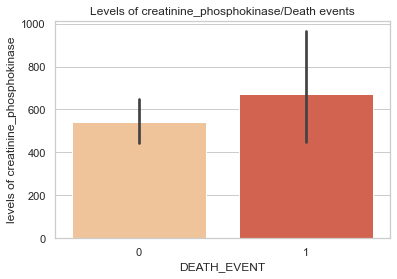

In [37]:
#bar-plot
sns.barplot(x=train["DEATH_EVENT"], y=train["creatinine_phosphokinase"], palette="OrRd")
plt.ylabel("levels of creatinine_phosphokinase")
plt.title("Levels of creatinine_phosphokinase/Death events")
plt.show()

It can be observed that individuals with higher levels of creatinine_phosphokinase are more likely to suffer death from heart failure. But this observation does not coincide with our assessment of individual categories based on gender and levels of creatinine_phosphokinase. <br>
We will no visualise individual categories to arrive at a conclusion.

In [38]:
level_fem = ["Less", "Equal", "More", "Less", "Equal", "More"]
Survival_fem = ["Survive", "Survive", "Survive", "Not-Survive", "Not-Survive", "Not-Survive"]
Percentage_fem = [female_lvl_less_survive.sum()/females.sum()*100, female_lvl_equal_survive.sum()/females.sum()*100, 
          female_lvl_more_survive.sum()/females.sum()*100, female_lvl_less_not_survive.sum()/females.sum()*100, 
          female_lvl_equal_not_survive.sum()/females.sum()*100, female_lvl_more_not_survive.sum()/females.sum()*100]

df_creatinine_phosphokinase_fem = pd.DataFrame({"Level_fem": level_fem, "Survival_fem": Survival_fem, "Percentage":
                                               Percentage_fem})

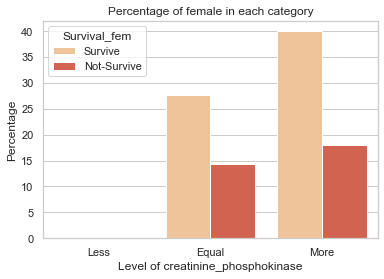

In [39]:
ax = sns.barplot(x="Level_fem", y="Percentage", hue="Survival_fem", data=df_creatinine_phosphokinase_fem, palette="OrRd")
plt.xlabel("Level of creatinine_phosphokinase")
plt.ylabel("Percentage")
plt.title("Percentage of female in each category")
plt.show()

In [40]:
level_mal = ["Less", "Equal", "More", "Less", "Equal", "More"]
Survival_mal = ["Survive", "Survive", "Survive", "Not-Survive", "Not-Survive", "Not-Survive"]
Percentage_mal = [male_lvl_less_survive.sum()/males.sum()*100, male_lvl_equal_survive.sum()/males.sum()*100, 
          male_lvl_more_survive.sum()/males.sum()*100, male_lvl_less_not_survive.sum()/males.sum()*100, 
          male_lvl_equal_not_survive.sum()/males.sum()*100, male_lvl_more_not_survive.sum()/males.sum()*100]

df_creatinine_phosphokinase_mal = pd.DataFrame({"Level_mal": level_mal, "Survival_mal": Survival_mal, "Percentage":
                                               Percentage_mal})

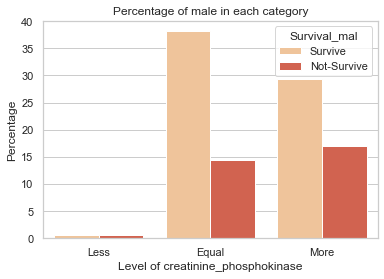

In [41]:
ax = sns.barplot(x="Level_mal", y="Percentage", hue="Survival_mal", data=df_creatinine_phosphokinase_mal, palette="OrRd")
plt.xlabel("Level of creatinine_phosphokinase")
plt.ylabel("Percentage")
plt.title("Percentage of male in each category")
plt.show()

<b>Conclusion:</b> On a larger scale, people with higher levels of creatinine_phosphokinase are more prone to die of heart failure. But assessing individual categories for sex (male and female) and levels of creatinine_phosphokinase (less than, equal to, more than) suggests that there is not much chance of people dying of higher levels of creatinine_phosphokinase.

### Feature4: Diabetes

In [42]:
#checking the column
print(train["diabetes"])

0      0
1      0
2      0
3      0
4      1
      ..
294    1
295    0
296    1
297    0
298    0
Name: diabetes, Length: 299, dtype: int64


Considering diabetes has boolean values, Diabetes - 0 = No, 1 = Yes, we can categorise individuals as diabetic or non-diabetic and then assess what proportion of people in those categories die of heart failure.


In [43]:
#categorising diabetic
diabetic = train["diabetes"] == 1

#categorising non-diabetic
non_diabetic = train["diabetes"] == 0